<a href="https://colab.research.google.com/github/abeer7asan/AI/blob/main/CNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import The Libraries

In [27]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [28]:
tf.__version__

'2.15.0'

## Data Preprocessing

### Preprocessing Training Data
we will apply some transformation on the training set ONLY
and we will not apply the same tranformation on the test set.

Why? The reason for that is: to avoid overfitting in computer vesion

what are these transformation
1. some zooms
2. some rotation
3. geomatrical transformation - shift some pixcels

we are doing "**image augmentation**"
this will result in generating new images to learn the model on

Reff for data processing on keras
https://keras.io/api/
https://keras.io/api/layers/preprocessing_layers/

image preprocessing:
1. https://keras.io/api/layers/preprocessing_layers/image_preprocessing/
2. https://keras.io/2.15/api/layers/preprocessing_layers/image_augmentation/


In [29]:
# build the tool instance that will generate all the transformation for our training dataset
train_data_generator =  ImageDataGenerator(
    rescale=1./255,  # feature scaling for each pixcel by deviding its value by 255 to get output between 0 and 1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


In [30]:
# Apply on our data set

training_set = train_data_generator.flow_from_directory('/content/drive/MyDrive/dataset/training_set',
                                                 target_size = (64, 64), # resize images to 64 *64 pixcel for faster training rather than 1024*1024
                                                 batch_size = 32,
                                                 class_mode = 'binary') # the class mode is binary as we have only two result cat and a dog

Found 8000 images belonging to 2 classes.


### Preprocessing Test Data

in the test set we are going to validate our model only, so no need to zoom, flip or shift images

The only thing we need is to rescale the pixcels because the model is trained on scalled pixcels


In [31]:
test_data_generator =  ImageDataGenerator(
    rescale=1./255,  # feature scaling for each pixcel by deviding its value by 255 to get output between 0 and 1
)

In [32]:
testing_set = test_data_generator.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1192 images belonging to 2 classes.


# **Part 2 - Building the CNN**


## Initialising the CNN
The cnn is created as a instance of the sequential class

The sequential class allows as to build a NN of sequantial layers.

now to add layers to the NN you use the add metod


In [33]:
cnn = tf.keras.models.Sequential() # this is general NN

### Step 1 - Convolution

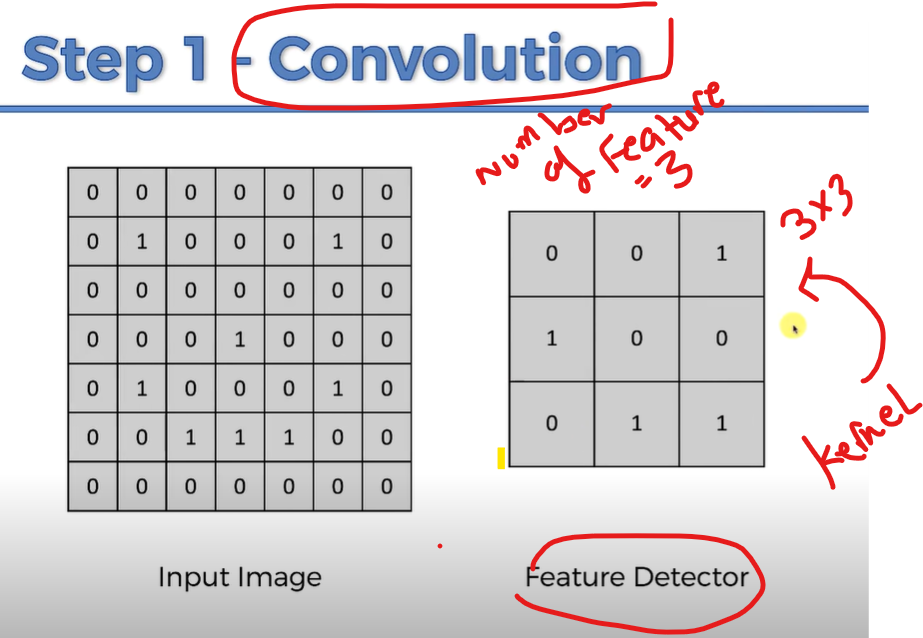

In [34]:
#add the first convolution layer
cnn.add( tf.keras.layers.Conv2D(
    filters = 32 ,  # the number of features you want to detect,
    kernel_size = 3, #  if you put 3 this means 3*3 feture detection metrix
    input_shape = [64, 64, 3], # because we reduce the images in our convolutional layer to 64 * 64 and 3 is RPG color images , if it is black and white then put 1
    activation = 'relu'
    ))
#the activation fucntion here is ReLu

### Step 2 - Pooling

Below is feature map

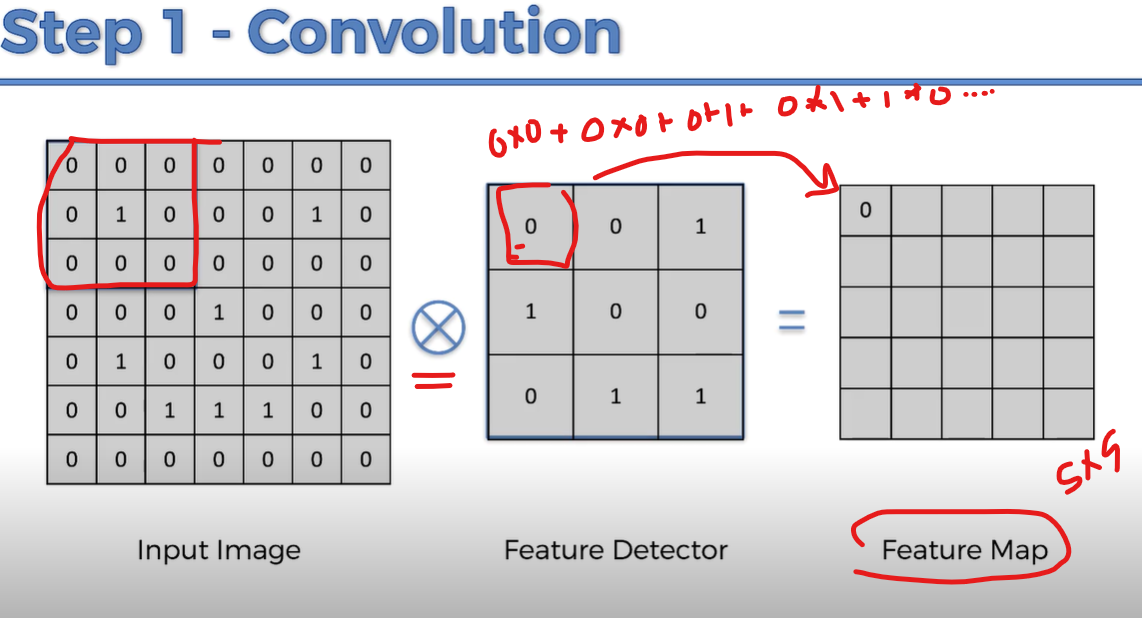

### feature map Result

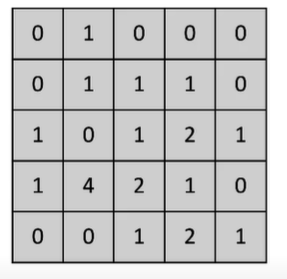

### apply max pooling
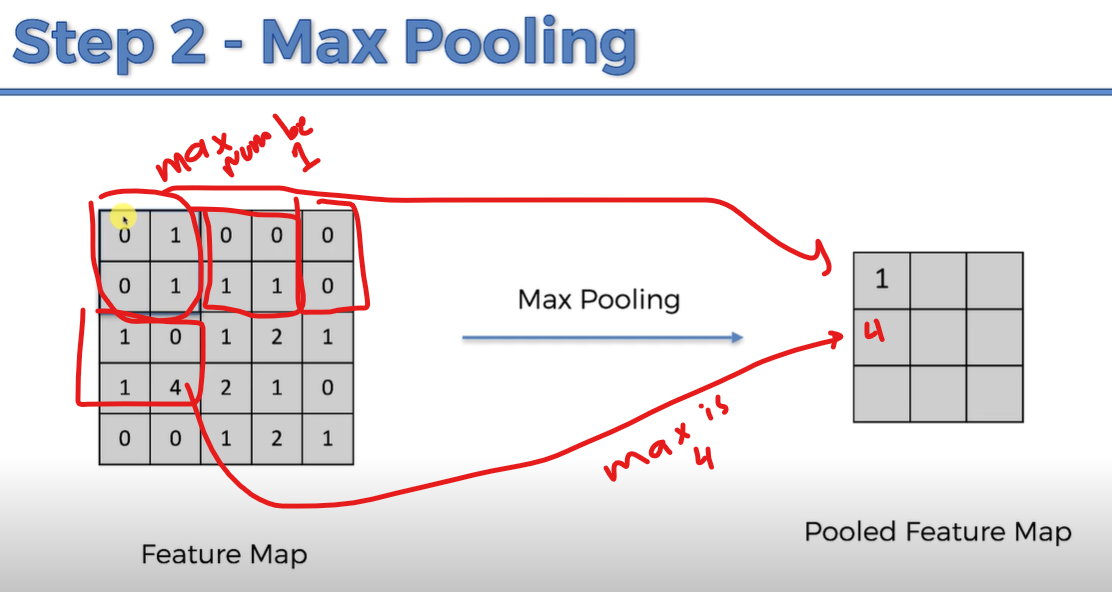

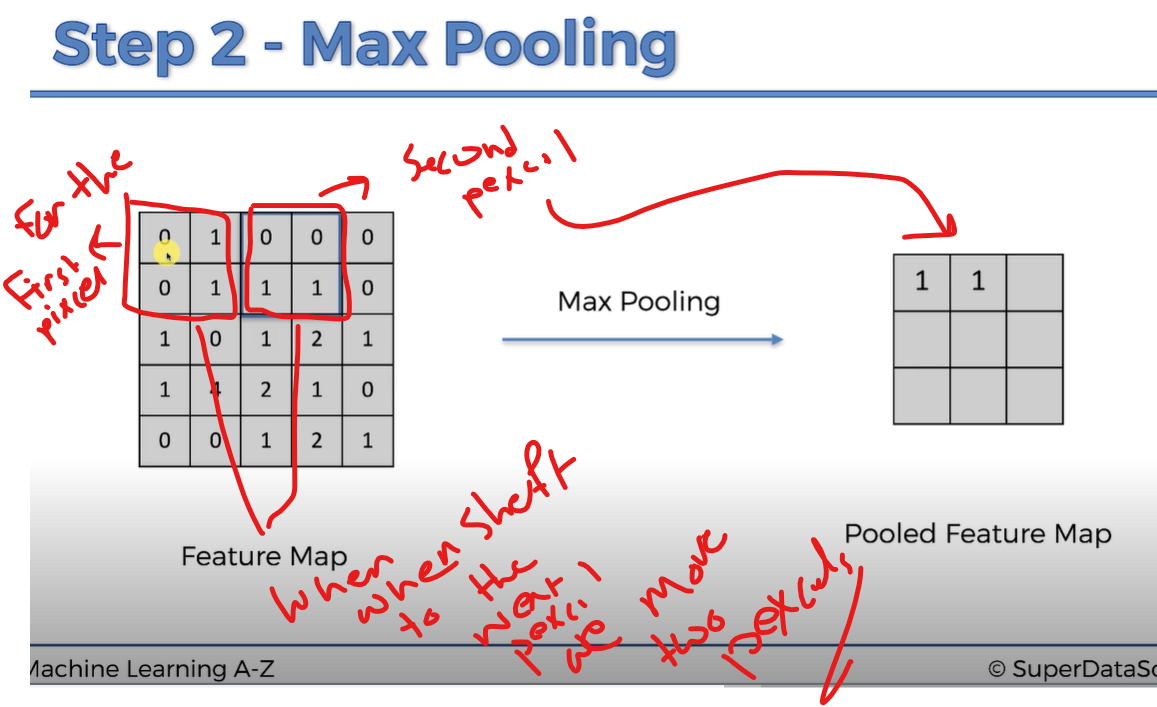

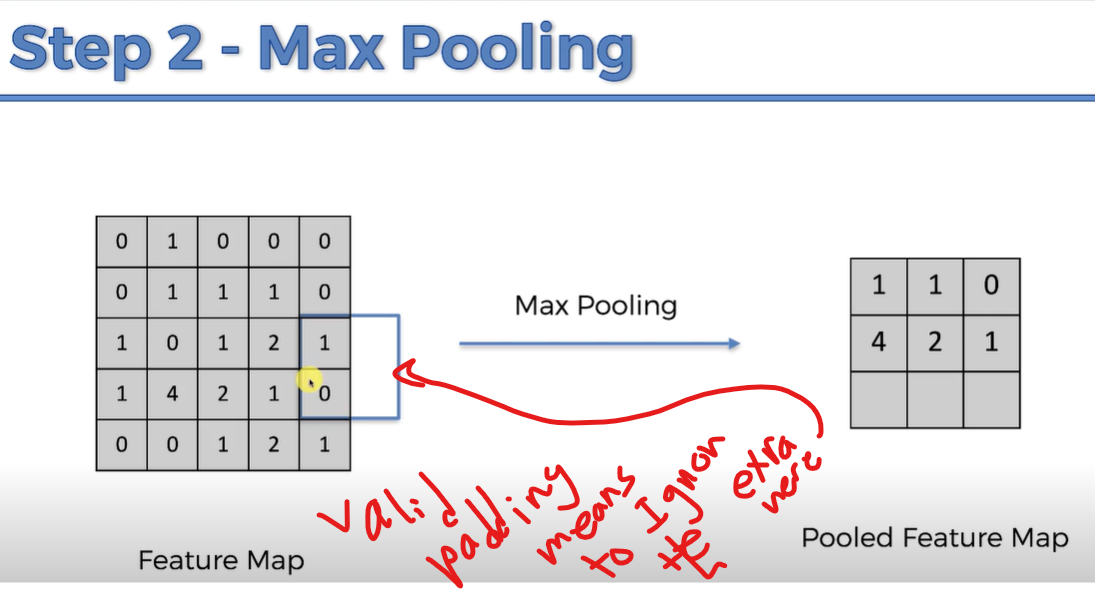

In [35]:
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2, # this means 2*2 metrix to find the max in
    strides = 2, # this means we will shift by 2 pixcels

))

### Adding a second convolutional layer

In [36]:
#add the second convolution layer
cnn.add( tf.keras.layers.Conv2D(
    filters = 32 ,  # the number of features you want to detect,
    kernel_size = 3, #  if you put 3 this means 3*3 feture detection metrix
    activation = 'relu'
    ))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2, # this means 2*2 metrix to find the max in
    strides = 2, # this means we will shift by 2 pixcels

))

### Step 3 - Flattening

in this step we flatten the result matrix to row to be unserted to the neural network


In [37]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

we will add a fully connected layers
this is denes

In [38]:
cnn.add(tf.keras.layers.Dense(
    units = 182 , # hidden neurals in the neural network. it should be large as this is computer vesion
    activation= 'relu'
    ))

### Step 6 - output layer - Full Connection
the output layer is also full connected and it should use the dens.
the number of units means the number of expected result, in our case it is dog or cat so the number of unit is one with value of zero or one.

In [39]:
cnn.add(tf.keras.layers.Dense(
    units = 1 , # hidden neurals in the neural network. it should be large as this is computer vesion
    activation= 'sigmoid' # because we have a binary output, if we have multi clase we have to choose softmax
    ))

## Part 3 - Training the CNN

In [40]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#adam is a method for calculating the gradient descent


### Training the CNN on the Training set and evaluating it on the Test set

In [42]:
cnn.fit(x = testing_set, validation_data = testing_set, epochs = 25)

Epoch 1/25
38/38 [==============================] - 371s 10s/step - loss: 0.4547 - accuracy: 0.8398 - val_loss: 0.4312 - val_accuracy: 0.8389
Epoch 2/25
38/38 [==============================] - 21s 548ms/step - loss: 0.4260 - accuracy: 0.8389 - val_loss: 0.3971 - val_accuracy: 0.8389
Epoch 3/25
38/38 [==============================] - 17s 436ms/step - loss: 0.3974 - accuracy: 0.8389 - val_loss: 0.3609 - val_accuracy: 0.8398
Epoch 4/25
38/38 [==============================] - 17s 462ms/step - loss: 0.3802 - accuracy: 0.8414 - val_loss: 0.4118 - val_accuracy: 0.8691
Epoch 5/25
38/38 [==============================] - 21s 550ms/step - loss: 0.3371 - accuracy: 0.8507 - val_loss: 0.2966 - val_accuracy: 0.8750
Epoch 6/25
38/38 [==============================] - 18s 489ms/step - loss: 0.2905 - accuracy: 0.8725 - val_loss: 0.2428 - val_accuracy: 0.8851
Epoch 7/25
38/38 [==============================] - 17s 441ms/step - loss: 0.2366 - accuracy: 0.8993 - val_loss: 0.1846 - val_accuracy: 0.9245


In [43]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 125ms/step


In [44]:
print(prediction)

dog
